In [14]:
import os
os.environ["TMPDIR"] = "/tmp"  # set the folder for temporary files

import numpy as np
import qiskit
print(qiskit.__version__)
from qiskit.opflow import StateFn, PauliExpectation, Zero, One,Z,X,I,Y,PauliOp,ListOp, AerPauliExpectation,DictStateFn,MatrixOp,PrimitiveOp, MatrixExpectation,ComposedOp
from qiskit.circuit.library import TwoLocal,EfficientSU2,UGate
# from qiskit.opflow.state_fns import CircuitStateFn
# from qiskit.opflow.converters import CircuitSampler
from qiskit import Aer
# from qiskit.utils.quantum_instance import QuantumInstance
from qiskit.test.mock import FakeMontreal
from qiskit.providers.aer.noise import NoiseModel


# from qiskit.chemistry.fermionic_operator import FermionicOperator
# from qiskit.providers.aer.library import SaveExpectationValueVariance

# from qiskit.algorithms.optimizers import COBYLA
# from qiskit.algorithms import VQE
# from qiskit_nature.converters.second_quantization import QubitConverter
# from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit.quantum_info.operators import Operator
from qiskit.circuit import Parameter
# from qiskit.providers.aer import AerSimulator,QasmSimulator
# from qiskit.aqua.operators.legacy import WeightedPauliOperator
from qiskit.quantum_info import Pauli

from random import random,seed
from math import pi
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

from scipy.optimize import curve_fit
import pickle
# #my functions
# import ESfunctions
# import EnhancedSampling


def is_unitary(m):
    return np.allclose(np.eye(m.shape[0]), m.H * m)

0.21.0


/tmp/ipykernel_86915/2342088407.py:13: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeMontreal


In [32]:
from qiskit.opflow import SummedOp
#Backend and Quantum instance
backend=Aer.get_backend('statevector_simulator')

#Hamiltonian
PauliH =SummedOp([PauliOp(Pauli(z=[True], x=[False]), coeff=1.0), PauliOp(Pauli(z=[True], x=[True]), coeff=1.0), PauliOp(Pauli(z=[False], x=[True]), coeff=1.0)], coeff=1.0, abelian=False)

#PauliH = WeightedPauliOperator([[1., Pauli(label ='Z')]])

print('Operator to be measured',PauliH, type(PauliH))

Operator to be measured SummedOp([
  Z,
  Y,
  X
]) <class 'qiskit.opflow.list_ops.summed_op.SummedOp'>


/tmp/ipykernel_86915/3481345229.py:6: DeprecationWarning: Passing 'z' and 'x' arrays separately to 'Pauli' is deprecated as of Qiskit Terra 0.17 and will be removed in version 0.23 or later. Use a tuple instead, such as 'Pauli((z, x[, phase]))'.
  PauliH =SummedOp([PauliOp(Pauli(z=[True], x=[False]), coeff=1.0), PauliOp(Pauli(z=[True], x=[True]), coeff=1.0), PauliOp(Pauli(z=[False], x=[True]), coeff=1.0)], coeff=1.0, abelian=False)


 Random angles assigned to ansatz {ParameterVectorElement(θ[0]): 2.9091610277393842, ParameterVectorElement(θ[1]): 2.345588042336162, ParameterVectorElement(θ[2]): 0.8704688011761168, ParameterVectorElement(θ[3]): 5.444768683596541}


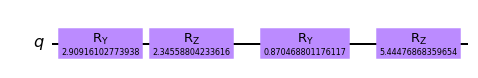

In [33]:
seed(9) #44 ok #494 wtf?
# Ansatz creation
# Define global variables
num_qubit = PauliH.num_qubits
ansz = EfficientSU2(num_qubit,['ry','rz'],reps=1)
angles_set = {}
param = ansz.ordered_parameters
for j in range(len(param)):
    angles_set[param[j]]= random()*2*pi
ansz_assigned = ansz.bind_parameters(angles_set)

print(' Random angles assigned to ansatz',angles_set)
ansz_assigned.decompose().draw(output='mpl',filename='EfficientSU2')


In [34]:
# from qiskit import execute
# result = execute(
#     self.circs,
#     backend=Aer.get_backend("qasm_simulator"),
#     shots=num_shots,
# ).result()

# 
# print( 'Exact',exact_energy)

# exact_energy= 0


In [35]:
data = pickle.load(open('data/hamiltonians_no_operator.pickle', "rb"))

h = data[3]

# qubitOp = h["operator"]

use_exact= False

if use_exact:
    # qc = h["exact_circuit"]
    exact = h["exact_value"]
else:
    # qc = h["vqe_circuit"]
    exact = h["vqe_value"]


print('exact value', exact)
# print('Circuit',qc)


if True:
    qc = ansz_assigned
    qubitOp = PauliH

print('Qubit Op:', qubitOp)

exact value -1.8321133743330758
Qubit Op: SummedOp([
  Z,
  Y,
  X
])


In [36]:
# # ###save data without 'operator'
# data_no_operator = data.copy()
# for elem in data_no_operator:
#     elem.pop('operator')
#     elem.pop('exact_circuit')
#     elem.pop('vqe_circuit')
# print(data)
# # save data_no_operator to pickle
# pickle.dump(data_no_operator, open("data/hamiltonians_no_operator.pickle", "wb"))


In [37]:
# from qiskit.circuit.library import NLocal
# from qiskit.quantum_info import SparsePauliOp

# qc = NLocal(num_qubits=num_qubit, reps=1)
# print(qubitOp)

In [38]:
import logging
from povm.estimator_updated import POVMEstimator,GradPOVMEstimator,GooglePOVMEstimator,PauliEstimator, GroupedPauliEstimator, GoogleGradPOVMEstimator

# logging.basicConfig(level=logging.DEBUG)

povm_optimal_params =[]

 

povm_test_params = np.array([0.25, 0.30408672, 0, 0.5, 0.5, 0.25, 0.5, 1])

_SIC_PARAMS = np.array([0.25, 0.30408672, 0.125, 0.5, 0.5, 0.25, 0.5, 0.75])


estimator = POVMEstimator(qc, qubitOp, exact, return_counts=False)#, povm_params=povm_test_params ) #povm_optimal_params
# p_estimator = PauliEstimator(qc, qubitOp, exact, return_counts=False)
# gp_estimator = GroupedPauliEstimator(qc, qubitOp, exact, return_counts=False)

# #estimator = GoogleGradPOVMEstimator(qc, qubitOp, exact, return_counts=False)
# grad_estimator = GradPOVMEstimator(qc, qubitOp, exact, return_counts=False)#, povm_params=povm_optimal_params)

Initializing POVMOperator
Here
self._k: ['Z', 'Y', 'X']
self._c_k: [1.+0.j 1.+0.j 1.+0.j]


In [50]:
num_shots=10000

print('shots:', num_shots)

#print(result)

print('\n Unoptimized POVM measurement:')
for result in estimator.estimate(num_shots):
    print('value',result['estimate'],', estimated_error',result['estimated_error'],' ,number of circuits', result['circuits'], ' ,shots per circuit',result['shots_per_circuit'])


# print('\nStandard Pauli measurement:')
# for result in p_estimator.estimate(num_shots):
#     print('value',result['estimate'],', estimated_error',result['estimated_error'],' ,number of circuits', result['circuits'], ' ,shots per circuit',result['shots_per_circuit'])

# print('\nGrouped Pauli measurement:')
# for result in gp_estimator.estimate(num_shots):
#     print('value',result['estimate'],', estimated_error',result['estimated_error'],' ,number of circuits', result['circuits'], ' ,shots per circuit',result['shots_per_circuit'])


# print('\n Optimized POVM measurement:')
# for result in grad_estimator.estimate(num_shots):
    
#     print('value',result['estimate'],', estimated_error',result['estimated_error'], 'shots',result['shots_per_circuit'],' ,number of circuits', result['circuits'])


print('\nexact result',result['true'])

shots: 10000

 Unoptimized POVM measurement:
shots_per_circuit 10000 10000
result Result(backend_name='qasm_simulator', backend_version='0.10.4', qobj_id='57eccd0e-dfb4-49b1-ba8e-51eb0eb926cf', job_id='54ef359c-5a88-4988-aef7-d86a69931ab8', success=True, results=[ExperimentResult(shots=10000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 1874, '0x0': 1260, '0x2': 4880, '0x3': 1986}), header=QobjExperimentHeader(clbit_labels=[['c2', 0], ['c2', 1]], creg_sizes=[['c2', 2]], global_phase=1.7434385931506209, memory_slots=2, metadata={}, n_qubits=2, name='EfficientSU2-94', qreg_sizes=[['q', 1], ['a', 1]], qubit_labels=[['q', 0], ['a', 0]]), status=DONE, seed_simulator=1906263837, metadata={'parallel_state_update': 8, 'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 2, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'statevector', 'active_input_qubits': [0, 1], 'num_clbits': 2, 'input_qubit_map': [[

In [40]:
result

{'qubits': 1,
 'true': -1.8321133743330758,
 'estimate': -0.22329209183258772,
 'estimated_error': 0.025207406752755308,
 'error': 1.608821282500488,
 'circuits': 1,
 'shots_per_circuit': 10000,
 'shots': 10000,
 'time_qc': 0.04497361183166504,
 'time_post': 0.0010194778442382812,
 'method': 'SIC-POVM',
 'counts': None,
 'povm_params': [0.25, 0.30408672, 0.125, 0.5, 0.5, 0.25, 0.5, 0.75]}

In [41]:
from povm.povm_operator import POVMOperator

sic_povm = POVMOperator(qubitOp, povm_params=result['povm_params'])

print(sic_povm._unitaries[0][0][0:2])
print(sic_povm._unitaries[0][1][0:2])
print(sic_povm._unitaries[0][2][0:2])
print(sic_povm._unitaries[0][3][0:2])
#print(sic_povm._povms[0])

print('SIC POVM')

sic_povm = POVMOperator(qubitOp, povm_params=_SIC_PARAMS)

print(sic_povm._unitaries[0][0][0:2])
print(sic_povm._unitaries[0][1][0:2])
print(sic_povm._unitaries[0][2][0:2])
print(sic_povm._unitaries[0][3][0:2])

ImportError: cannot import name 'BaseBackend' from 'qiskit.providers' (/home/gsilvi/miniforge3/envs/latestQiskit/lib/python3.9/site-packages/qiskit/providers/__init__.py)

In [ ]:
#test
from qiskit.chemistry.transformations import (FermionicTransformation,
                                              FermionicTransformationType,
                                              FermionicQubitMappingType)

fermionic_transformation_JW = FermionicTransformation(
            transformation=FermionicTransformationType.FULL,
            qubit_mapping=FermionicQubitMappingType.JORDAN_WIGNER,
            two_qubit_reduction=False,
            freeze_core=True)

fermionic_transformation_JKMN = FermionicTransformation(
            transformation=FermionicTransformationType.FULL,
            qubit_mapping=FermionicQubitMappingType.NEVEN,
            two_qubit_reduction=False,
            freeze_core=True)

from qiskit.chemistry.drivers import PySCFDriver, UnitsType, Molecule
molecule = Molecule(geometry=[['H', [0., 0., 0.]],
                              ['H', [0., 0., 0.735]]],
                     charge=0, multiplicity=1)
driver = PySCFDriver(molecule = molecule, unit=UnitsType.ANGSTROM, basis='sto3g')


In [ ]:
from qiskit import BasicAer
from qiskit.aqua.algorithms import VQE
from qiskit.aqua import QuantumInstance
from qiskit.chemistry.algorithms.ground_state_solvers.minimum_eigensolver_factories import VQEUCCSDFactory

vqe_solver = VQEUCCSDFactory(QuantumInstance(BasicAer.get_backend('statevector_simulator')))

num_qubits = 4
tl_circuit = TwoLocal(num_qubits, ['h', 'rx'], 'cz',
                      entanglement='full', reps=3, parameter_prefix = 'y')

tl_circuit.draw(output = 'mpl')

another_solver = VQE(var_form = tl_circuit,
                     quantum_instance = QuantumInstance(BasicAer.get_backend('statevector_simulator')))

In [ ]:
from qiskit.chemistry.algorithms.ground_state_solvers import GroundStateEigensolver

calc = GroundStateEigensolver(fermionic_transformation_JW, another_solver)
res = calc.solve(driver)

print(res)


calc = GroundStateEigensolver(fermionic_transformation_JKMN, another_solver)
res = calc.solve(driver)

print(res)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.85727497932
  - computed part:      -1.85727497932
  - frozen energy part: 0.0
  - particle hole part: 0.0
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.137305984871
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.38894867]
    - computed part:      [0.0  0.0  1.38894867]
    - frozen energy part: [0.0  0.0  0.0]
    - particle hole part: [0.0  0.0  0.0]
  > Dipole moment (a.u.): [0.0  0.0  0.00000003]  Total: 0.00000003
                 (debye): [0.0  0.0  0.00000007]  Total: 0.00000007
 
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857274599627
  - computed part:      -1.857274599627
  - frozen energy part: 0.0
  - particle hole part: 0.0
~ Nuclear repul

### Extras

In [ ]:
qubit_op, _ = fermionic_transformation_JW.transform(driver)
print(qubit_op)
print(fermionic_transformation_JW.molecule_info)

SummedOp([
  -0.8105479805373261 * IIII,
  0.17218393261915532 * IIIZ,
  -0.22575349222402513 * IIZI,
  0.17218393261915535 * IZII,
  -0.2257534922240251 * ZIII,
  0.12091263261776639 * IIZZ,
  0.16892753870087923 * IZIZ,
  0.04523279994605789 * XXYY,
  0.04523279994605789 * YYYY,
  0.04523279994605789 * XXXX,
  0.04523279994605789 * YYXX,
  0.16614543256382427 * ZIIZ,
  0.16614543256382427 * IZZI,
  0.1746434306830047 * ZIZI,
  0.12091263261776639 * ZZII
])
{'num_particles': [1, 1], 'num_orbitals': 4, 'two_qubit_reduction': False, 'z2_symmetries': <qiskit.aqua.operators.legacy.weighted_pauli_operator.Z2Symmetries object at 0x7fd044c24340>}


In [ ]:
qubit_op, _ = fermionic_transformation_JKMN.transform(driver)
print('JKMN:\n',qubit_op)
print(fermionic_transformation_JW.molecule_info)

JKMN:
 SummedOp([
  -0.8105479805373261 * IIII,
  0.17218393261915532 * IZII,
  -0.22575349222402513 * ZZXI,
  0.17218393261915535 * IIXI,
  -0.2257534922240251 * IIIZ,
  0.12091263261776639 * ZIXI,
  0.16892753870087923 * IZXI,
  -0.04523279994605789 * YXYX,
  -0.04523279994605789 * YXZY,
  0.04523279994605789 * XXZX,
  -0.04523279994605789 * XXYY,
  0.16614543256382427 * IZIZ,
  0.16614543256382427 * ZZII,
  0.1746434306830047 * ZZXZ,
  0.12091263261776639 * IIXZ
])
{'num_particles': [1, 1], 'num_orbitals': 4, 'two_qubit_reduction': False, 'z2_symmetries': <qiskit.aqua.operators.legacy.weighted_pauli_operator.Z2Symmetries object at 0x7fd044c24340>}
